In [1]:
#laoding a data set
df=pd.read_csv("C:\\Users\\Pratik1\Desktop\ML_DL_AI\\data's\\loan_data.csv")
df.head()

<IPython.core.display.Javascript object>

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
#check for na values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
#filling null values
for col in df.columns:
    df.fillna(0,inplace=True)

In [4]:
#check for fill or not
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
#use of labelEnocder to convert obj to int
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Education']=le.fit_transform(df['Education'])

In [8]:
#check for conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(3), int64(1), object(5)
memory usage: 55.3+ KB


<IPython.core.display.Javascript object>

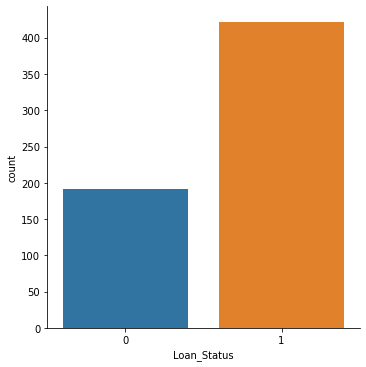

In [9]:
#getting count of values in loan status
sns.catplot(data=df,x='Loan_Status',kind='count')

<IPython.core.display.Javascript object>

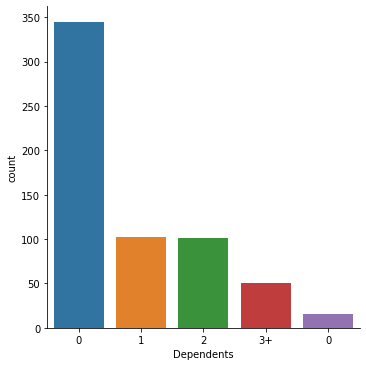

In [17]:
#count in dependants
sns.catplot(data=df,x="Dependents",kind="count")

<IPython.core.display.Javascript object>

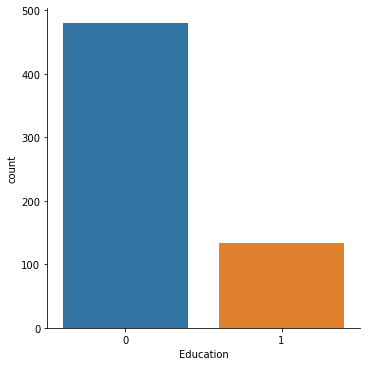

In [18]:
#count in education
sns.catplot(data=df,x="Education",kind="count")

<IPython.core.display.Javascript object>

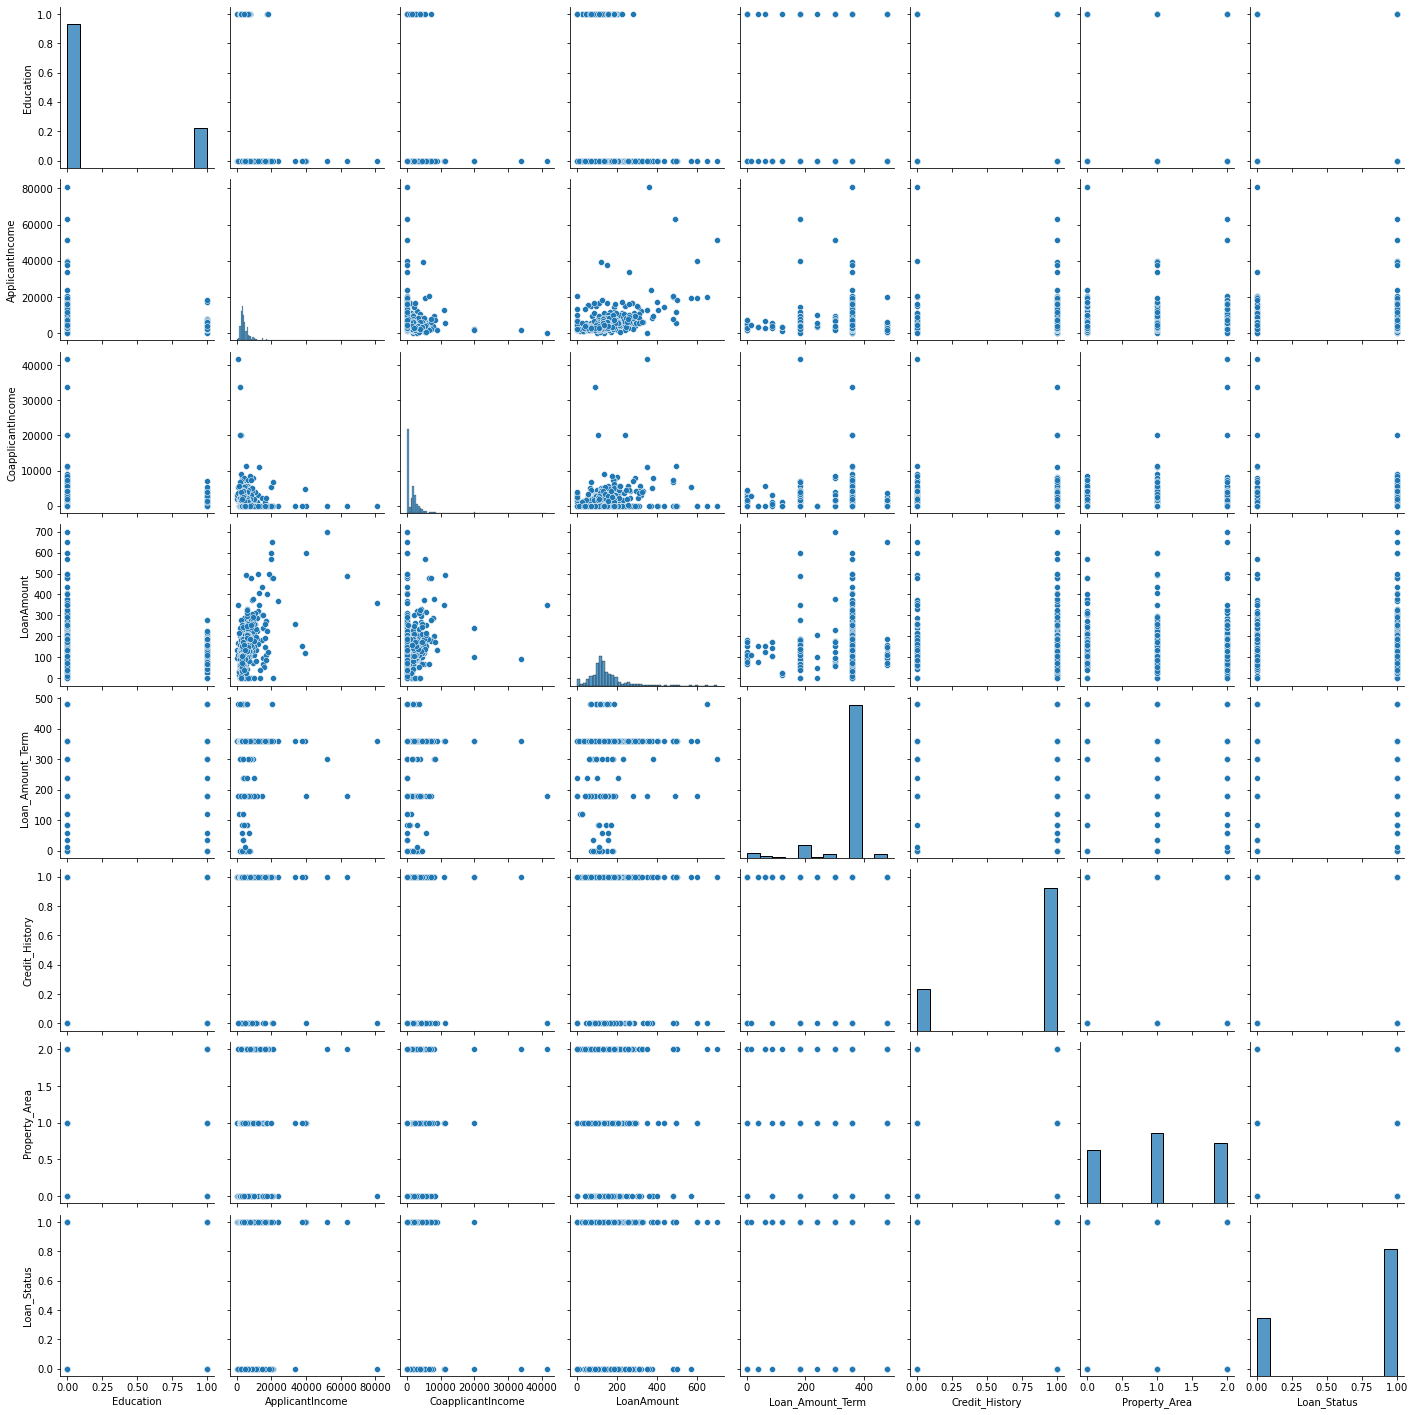

In [10]:
#plotting all features
sns.pairplot(df)

In [11]:
#descriptive stastistics
df.describe()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.218241,5403.459283,1621.245798,141.166124,334.201954,0.773616,1.037459,0.687296
std,0.413389,6109.041673,2926.248369,88.340630,82.183884,0.418832,0.787482,0.463973
min,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

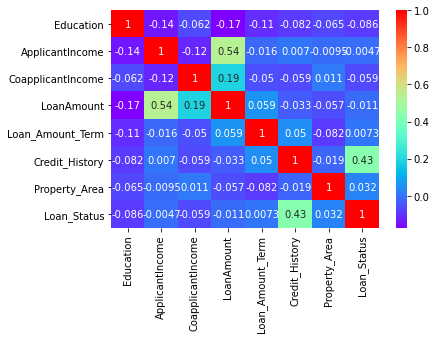

In [13]:
#heatmap along with value
sns.heatmap(df.corr(),cmap='rainbow',annot=True)

In [19]:
#dependant and independant variables
x=df.iloc[:,6:12]
y=df.iloc[:,-1]

In [20]:
#train and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [21]:
#model building
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [22]:
#preduction
ypred=model.predict(xtest)
print(ypred)

[1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1]


In [26]:
#performance parameters
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(ytest,ypred))

0.7804878048780488


In [27]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.63      0.50      0.56        34
           1       0.82      0.89      0.85        89

    accuracy                           0.78       123
   macro avg       0.73      0.69      0.71       123
weighted avg       0.77      0.78      0.77       123



In [31]:
cm=confusion_matrix(ypred,ytest)
print(cm)

[[17 10]
 [17 79]]


<IPython.core.display.Javascript object>

<AxesSubplot:>

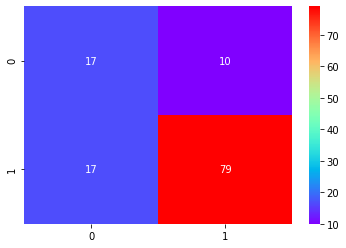

In [33]:
sns.heatmap(cm,annot=True,cmap='rainbow')

In [34]:
xtest

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
154,3254,0.0,50.0,360.0,1.0,2
201,4923,0.0,166.0,360.0,0.0,1
106,11417,1126.0,225.0,360.0,1.0,2
400,2889,0.0,45.0,180.0,0.0,2
120,5667,2667.0,180.0,360.0,1.0,0
...,...,...,...,...,...,...
215,3850,983.0,100.0,360.0,1.0,1
109,2071,754.0,94.0,480.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,2
299,2014,2925.0,113.0,360.0,1.0,2


In [38]:
from sklearn import metrics
ypred_prob=model.predict_proba(xtest)[:,1]
fpr,tpr,_=metrics.roc_curve(ytest,ypred_prob)
auc=metrics.roc_auc_score(ytest,ypred_prob)
print(auc)

0.6596166556510243


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

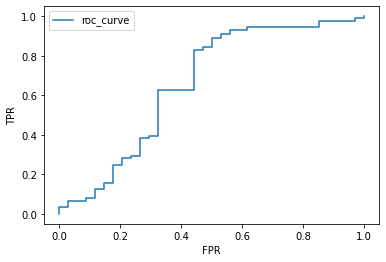

In [39]:
plt.plot(fpr,tpr,label='roc_curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()